**Importing Required Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import SimpleImputer
from matplotlib.colors import ListedColormap

**Load Dataset**

In [ ]:
df = pd.read_csv('rumah123_yogya_unfiltered.csv')
df.head()

,price,nav-link,description,listing-location,bed,bath,carport,surface_area,building_area
0,"Rp 1,79 Miliar",https://www.rumah123.com/properti/sleman/hos17...,Rumah 2 Lantai Baru di jalan Palagan Sleman Y...,"Ngaglik, Sleman",3.0,3.0,2.0,120 m²,110 m²
1,Rp 170 Juta,https://www.rumah123.com/properti/sleman/hos17...,RUMAH BARU DEKAT AL AZHAR DAN UGM,"Jombor, Sleman",3.0,2.0,1.0,102 m²,126 m²
2,Rp 695 Juta,https://www.rumah123.com/properti/sleman/hos17...,RUMAH ASRI DAN SEJUK DI BERBAH SLEMAN DEKAT PA...,"Berbah, Sleman",2.0,2.0,1.0,100 m²,100 m²
3,Rp 560 Juta,https://www.rumah123.com/properti/sleman/hos17...,Rumah Murah 5 Menit Dari Candi Prambanan Tersi...,"Prambanan, Sleman",3.0,1.0,1.0,109 m²,67 m²
4,Rp 200 Juta,https://www.rumah123.com/properti/sleman/hos17...,Rumah Murah Cicilan 1jt Di Moyudan Sleman,"Moyudan, Sleman",2.0,1.0,1.0,60 m²,30 m²


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2020 entries, 0 to 2019
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             2020 non-null   object 
 1   nav-link          2020 non-null   object 
 2   description       2020 non-null   object 
 3   listing-location  2020 non-null   object 
 4   bed               2001 non-null   float64
 5   bath              1999 non-null   float64
 6   carport           1713 non-null   float64
 7   surface_area      2019 non-null   object 
 8   building_area     2019 non-null   object 
dtypes: float64(3), object(6)
memory usage: 142.2+ KB


**Formatting Price Data**

In [ ]:
def format_price(price_str):
    if pd.isnull(price_str):
        return None

    price_str = price_str.replace(',', '.').replace('Rp', '').strip()
    if 'Juta' in price_str:
        price_num = float(price_str.replace('Juta', '').strip()) * 1000000
    elif 'Miliar' in price_str:
        price_num = float(price_str.replace('Miliar', '').strip()) * 1000000000
    else:
        try:
            price_num = int(float(price_str))
        except ValueError:
            return None

    return int(price_num)


df['price'] = df['price'].apply(format_price)

df.head()

,price,nav-link,description,listing-location,bed,bath,carport,surface_area,building_area
0,1790000000,https://www.rumah123.com/properti/sleman/hos17...,Rumah 2 Lantai Baru di jalan Palagan Sleman Y...,"Ngaglik, Sleman",3.0,3.0,2.0,120 m²,110 m²
1,170000000,https://www.rumah123.com/properti/sleman/hos17...,RUMAH BARU DEKAT AL AZHAR DAN UGM,"Jombor, Sleman",3.0,2.0,1.0,102 m²,126 m²
2,695000000,https://www.rumah123.com/properti/sleman/hos17...,RUMAH ASRI DAN SEJUK DI BERBAH SLEMAN DEKAT PA...,"Berbah, Sleman",2.0,2.0,1.0,100 m²,100 m²
3,560000000,https://www.rumah123.com/properti/sleman/hos17...,Rumah Murah 5 Menit Dari Candi Prambanan Tersi...,"Prambanan, Sleman",3.0,1.0,1.0,109 m²,67 m²
4,200000000,https://www.rumah123.com/properti/sleman/hos17...,Rumah Murah Cicilan 1jt Di Moyudan Sleman,"Moyudan, Sleman",2.0,1.0,1.0,60 m²,30 m²


**Formatting Area Data**

In [ ]:
def format_area(area_str):
    try:
        area_str = str(area_str).replace('m²', '').strip()
        return int(area_str)
    except (ValueError, TypeError):
        return None

df['surface_area'] = df['surface_area'].apply(format_area)
df['building_area'] = df['building_area'].apply(format_area)

df.head()

,price,nav-link,description,listing-location,bed,bath,carport,surface_area,building_area
0,1790000000,https://www.rumah123.com/properti/sleman/hos17...,Rumah 2 Lantai Baru di jalan Palagan Sleman Y...,"Ngaglik, Sleman",3.0,3.0,2.0,120.0,110.0
1,170000000,https://www.rumah123.com/properti/sleman/hos17...,RUMAH BARU DEKAT AL AZHAR DAN UGM,"Jombor, Sleman",3.0,2.0,1.0,102.0,126.0
2,695000000,https://www.rumah123.com/properti/sleman/hos17...,RUMAH ASRI DAN SEJUK DI BERBAH SLEMAN DEKAT PA...,"Berbah, Sleman",2.0,2.0,1.0,100.0,100.0
3,560000000,https://www.rumah123.com/properti/sleman/hos17...,Rumah Murah 5 Menit Dari Candi Prambanan Tersi...,"Prambanan, Sleman",3.0,1.0,1.0,109.0,67.0
4,200000000,https://www.rumah123.com/properti/sleman/hos17...,Rumah Murah Cicilan 1jt Di Moyudan Sleman,"Moyudan, Sleman",2.0,1.0,1.0,60.0,30.0


**Handling Missing Values and Duplicates**

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isna().sum()

,0
price,0
nav-link,0
description,0
listing-location,0
bed,19
bath,21
carport,307
surface_area,1
building_area,1


In [ ]:
df = df.dropna(subset=['surface_area', 'building_area'])
df.isna().sum()

,0
price,0
nav-link,0
description,0
listing-location,0
bed,19
bath,21
carport,306
surface_area,0
building_area,0


**Filtering Data for Sleman Location**

In [ ]:
df_sleman = df[df['listing-location'].str.contains('Sleman', case=False, na=False)]
df_sleman.head()

,price,nav-link,description,listing-location,bed,bath,carport,surface_area,building_area
0,1790000000,https://www.rumah123.com/properti/sleman/hos17...,Rumah 2 Lantai Baru di jalan Palagan Sleman Y...,"Ngaglik, Sleman",3.0,3.0,2.0,120.0,110.0
1,170000000,https://www.rumah123.com/properti/sleman/hos17...,RUMAH BARU DEKAT AL AZHAR DAN UGM,"Jombor, Sleman",3.0,2.0,1.0,102.0,126.0
2,695000000,https://www.rumah123.com/properti/sleman/hos17...,RUMAH ASRI DAN SEJUK DI BERBAH SLEMAN DEKAT PA...,"Berbah, Sleman",2.0,2.0,1.0,100.0,100.0
3,560000000,https://www.rumah123.com/properti/sleman/hos17...,Rumah Murah 5 Menit Dari Candi Prambanan Tersi...,"Prambanan, Sleman",3.0,1.0,1.0,109.0,67.0
4,200000000,https://www.rumah123.com/properti/sleman/hos17...,Rumah Murah Cicilan 1jt Di Moyudan Sleman,"Moyudan, Sleman",2.0,1.0,1.0,60.0,30.0


In [ ]:
df_sleman.shape[0]

1348

**Sampling Data for Model Training**

In [ ]:
df_sampled = df_sleman.sample(n=300, random_state=0)

**Feature Selection and Preprocessing**

In [ ]:
x = df_sampled[['building_area', 'surface_area']].values
y = (df_sampled['price'] > df_sampled['price'].median()).astype(int).values

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

In [ ]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

**Model Training**

In [ ]:
classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
classifier.fit(x_train, y_train)

KNeighborsClassifier()

**Making Predictions**

In [78]:
y_pred = classifier.predict(x_test)

**Evaluating the Model**

In [79]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[21 13]
 [ 4 37]]


**Visualizing the Training Set Results**

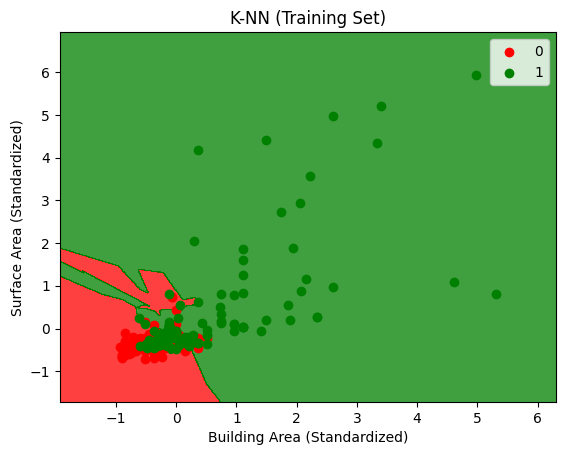

In [88]:
x_set, y_set = x_train, y_train
x1, x2 = np.meshgrid(
    np.arange(start=x_set[:, 0].min() - 1, stop=x_set[:, 0].max() + 1, step=0.01),
    np.arange(start=x_set[:, 1].min() - 1, stop=x_set[:, 1].max() + 1, step=0.01)
)

plt.contourf(
    x1, x2,
    classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
    alpha=0.75,
    cmap=ListedColormap(['red', 'green'])
)
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(
        x_set[y_set == j, 0], x_set[y_set == j, 1],
        c=['red', 'green'][i], label=j
    )

plt.title('K-NN (Training Set)')
plt.xlabel('Building Area (Standardized)')
plt.ylabel('Surface Area (Standardized)')
plt.legend()
plt.show()

**Visualizing the Testing Set Results**

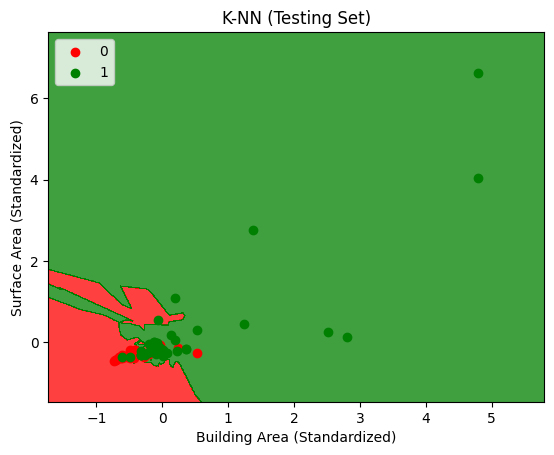

In [89]:
x_set, y_set = x_test, y_test
x1, x2 = np.meshgrid(
    np.arange(start=x_set[:, 0].min() - 1, stop=x_set[:, 0].max() + 1, step=0.01),
    np.arange(start=x_set[:, 1].min() - 1, stop=x_set[:, 1].max() + 1, step=0.01)
)

plt.contourf(
    x1, x2,
    classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
    alpha=0.75,
    cmap=ListedColormap(['red', 'green'])
)
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(
        x_set[y_set == j, 0], x_set[y_set == j, 1],
        c=['red', 'green'][i], label=j
    )

plt.title('K-NN (Testing Set)')
plt.xlabel('Building Area (Standardized)')
plt.ylabel('Surface Area (Standardized)')
plt.legend()
plt.show()